In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
participant_data = pd.read_csv("Demographics Information - Human Participants.csv")
print(participant_data.shape)
participant_data.head()

(175, 22)


,Study Name/Number,Race,Present,Ethnicity,Present.1,Study sample size,Male,Female,Total N,Gender/Sex,...,Present.3,Country/Region,Location,Pre-existing conditions and/or Symptoms,Instruments used,Socioeconomic Status,Data Collected (differnent levels of),Date of Study was Conducted/Published,Date of Study Posted on PhysioNet,Unnamed: 21
0,Abdominal and Direct Fetal ECG Database: Multi...,X,0,X,0,5 women in labor were analyzed,X,X,X,Unknown (collected from fetal heartbeats of pr...,...,1,Poland,Department of Obstetrics at the Medical Univer...,Women in labor,"KOMPOREL System (ITAM Institute, Zabrze, Polan...",X,NaN,NaN,NaN,NaN
1,AF Termination Challenge Database: ECG recordi...,X,0,X,0,Three groups in Learning Set: 1. Group N (non...,X,X,X,X,...,0,USA,X,X,Not listed; two ECG signals used,X,NaN,NaN,NaN,NaN
2,AHA Database Sample Excluded Record: Two ECG s...,X,0,X,0,80 recordings (10 for each existing condition)...,X,X,X,X,...,0,USA,Washington University (St. Louis),"No ventricular ectopy, isolated unifocal PVCs,...",Not listed; two ECG signals used,X,NaN,NaN,NaN,NaN
3,A large scale 12-lead electrocardiogram databa...,X,0,X,0,"45, 152 patients",X,X,X,Male and Female,...,1,China,"Chapman University, Shaoxing People's Hospital...",Includes information about pre-existing condit...,GE MUSE ECG System,X,NaN,NaN,NaN,NaN
4,A multi-camera and multimodal dataset for post...,X,0,X,0,14,10,4,14,10 males; 4 females,...,1,Portugal,Portugal (University of Minho),No clinical history of any abnormalities,MVN BIOMECH,X,"walking straight in a corridor, turning right ...",NaN,NaN,NaN


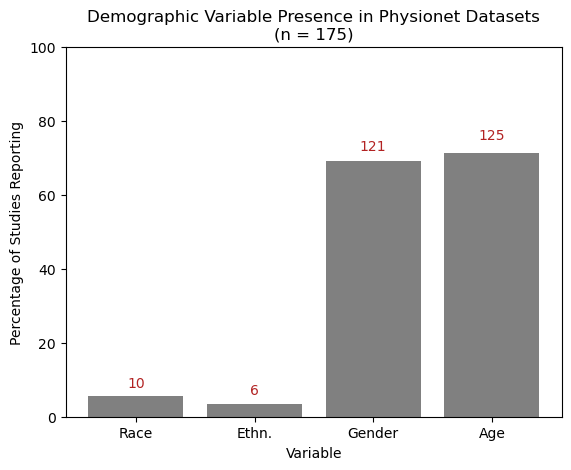

In [3]:
def addlabels(x,y,c):
    for i in range(len(x)):
        plt.text(i, y[i], c[i], ha = 'center', color = 'firebrick') # choose a color so the number above the bar is not confused witht he y axis labels

race = [5.71]
ethnicity = [3.43]
gender = [69.14]
age = [71.43]

data = {'Race': 5.71, 'Ethn.': 3.43, 'Gender': 69.14, 'Age': 71.43}
vars = list(data.keys())
values = list(data.values())

plt.bar(vars, values, color = 'grey')
plt.title('Demographic Variable Presence in Physionet Datasets\n(n = 175)')
plt.ylabel("Percentage of Studies Reporting")
plt.xlabel("Variable")
plt.ylim(0, 100)

vars1 = ["Race", "Ethn.", "Gender", "Age"]
vals = [8, 6, 72, 75]
counts = [10, 6, 121, 125]
addlabels(vars1, vals, counts)

In [4]:
age_data = pd.read_csv("Demographics Information - Age.csv")
print(age_data.shape)
age_data.head()

(175, 7)


,Age,Average Age,Min Age,Ma Age,Total N,Ages reported in groups/not in groups,or take bottom value/upper value of the total
0,38-41 weeks in gestation,NaN,NaN,NaN,NaN,NaN,NaN
1,X,NaN,NaN,NaN,NaN,NaN,NaN
2,X,NaN,NaN,NaN,NaN,NaN,NaN
3,Includes age,NaN,NaN,NaN,NaN,NaN,NaN
4,> 18 years old,NaN,18.0,NaN,14.0,NaN,NaN


In [5]:
no_outlier = age_data.drop(age_data.index[123])
avg_age = age_data["Average Age"].dropna()
avg_age.head()
# print(avg_age.size)
print(avg_age.mean())

36.816057692307695


In [6]:
cleaned = age_data
## .dropna(subset=['Ma Age', 'Total N'])
min_age = cleaned["Min Age"].dropna()
min_age.head()
# print(min_age.size)
print(min_age.mean())

24.441358024685186


In [7]:
max_age = cleaned["Ma Age"].dropna()
max_age.head()
# print(max_age.size)
# print(max_age.mean())

6     63.0
7     34.0
12    71.0
13    90.0
14    65.0
Name: Ma Age, dtype: float64

In [8]:
maxAvg = cleaned.max(axis=0)['Average Age']
minAvg = cleaned.min(axis=0)['Average Age']
avgBins = (maxAvg-minAvg)
print(maxAvg, minAvg, avgBins)
print(cleaned['Average Age'].mean())

78.36 6.1 72.26
36.816057692307695


/var/folders/fr/ll6js0lj7fn2yj36y64f4z4h0000gn/T/ipykernel_68005/1412212747.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  maxAvg = cleaned.max(axis=0)['Average Age']
/var/folders/fr/ll6js0lj7fn2yj36y64f4z4h0000gn/T/ipykernel_68005/1412212747.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  minAvg = cleaned.min(axis=0)['Average Age']


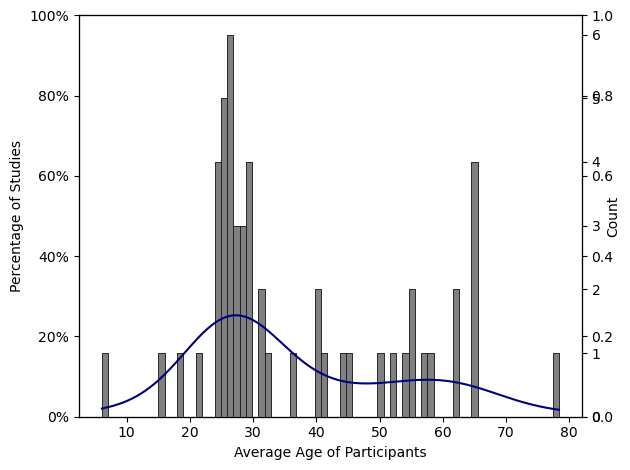

In [9]:
from matplotlib.ticker import PercentFormatter

fig, ax = plt.subplots()
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xlabel("Average Age of Participants")
plt.ylabel("Percentage of Studies")
ax2 = ax.twinx()
ax2 = ax.twinx()
sns.histplot(avg_age, kde=True, ax=ax2, bins = 73, color = 'navy')
plt.hist(avg_age, color = 'grey', bins = 73, edgecolor = 'black', linewidth = .4)
plt.tight_layout()
plt.show()


In [10]:
# print(cleaned[cleaned['Min Age'] == cleaned['Min Age'].max()])
# print(cleaned[cleaned['Min Age'] == cleaned['Min Age'].min()])

maxMin = cleaned.max(axis=0)['Min Age']
minMin = cleaned.min(axis=0)['Min Age']
minBins = (maxMin-minMin)
print(maxMin, minMin, minBins)

65.0 0.0 65.0


/var/folders/fr/ll6js0lj7fn2yj36y64f4z4h0000gn/T/ipykernel_68005/3469288051.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  maxMin = cleaned.max(axis=0)['Min Age']
/var/folders/fr/ll6js0lj7fn2yj36y64f4z4h0000gn/T/ipykernel_68005/3469288051.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  minMin = cleaned.min(axis=0)['Min Age']


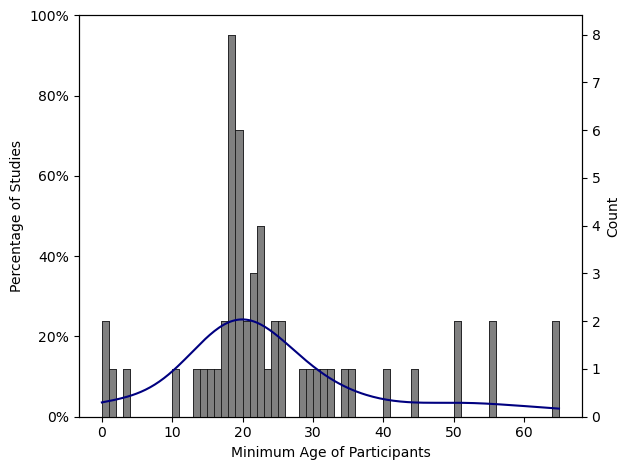

In [11]:
fig, ax = plt.subplots()
plt.xlabel("Minimum Age of Participants")
plt.ylabel("Percentage of Studies")
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
ax2 = ax.twinx()
sns.histplot(min_age, kde = True, ax=ax2, bins = 65, color = 'navy')
plt.hist(min_age, color = 'grey', bins = 65, edgecolor = 'black', linewidth = .4)
plt.tight_layout()
plt.show()

In [12]:
# print(cleaned[cleaned['Ma Age'] == cleaned['Ma Age'].max()])
# print(cleaned[cleaned['Ma Age'] == cleaned['Ma Age'].min()])

maxMax = cleaned.max(axis=0)['Ma Age']
minMax = cleaned.min(axis=0)['Ma Age']
maxBins = (maxMax-minMax)
print(maxMax, minMax, maxBins)

95.0 13.58333333 81.41666667


/var/folders/fr/ll6js0lj7fn2yj36y64f4z4h0000gn/T/ipykernel_68005/1535142572.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  maxMax = cleaned.max(axis=0)['Ma Age']
/var/folders/fr/ll6js0lj7fn2yj36y64f4z4h0000gn/T/ipykernel_68005/1535142572.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  minMax = cleaned.min(axis=0)['Ma Age']


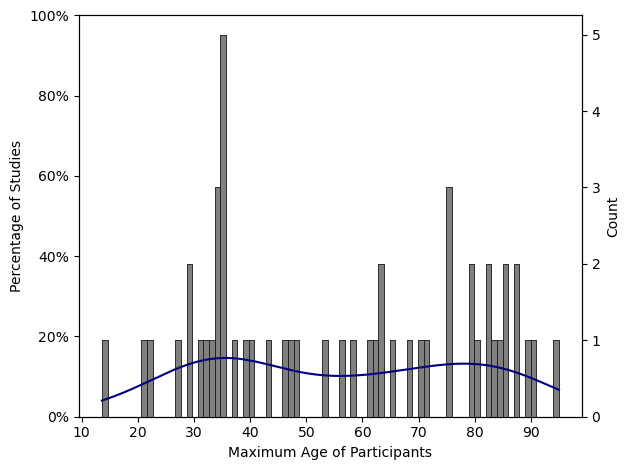

In [13]:
fig, ax = plt.subplots()
plt.xlabel("Maximum Age of Participants")
plt.ylabel("Percentage of Studies")
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
ax2 = ax.twinx()
sns.histplot(max_age, ax=ax2, kde = True, bins = 81, color = 'navy')
plt.hist(max_age, color = 'grey', bins = 81, edgecolor = 'black', linewidth = .4)

plt.tight_layout()
plt.show()